1. Data Import and Cleaning:

Import the dataset using Pandas.
Clean and preprocess the data, addressing missing values and categorizing data as needed.
Convert dates and other relevant fields to appropriate formats.

In [1]:
#Import the dataset using Pandas.
import pandas as pd

df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')  # or 'cp1252'
df.dropna(axis=0, subset=['Aboard', 'Fatalities'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df['Year'] = df['Date'].dt.year


print(df.head())
print(df.describe())
print(df.info())


        Date   Time                            Location  \
0 1908-09-17  17:18                 Fort Myer, Virginia   
1 1909-09-07    NaN             Juvisy-sur-Orge, France   
2 1912-07-12   6:30           Atlantic City, New Jersey   
3 1913-08-06    NaN  Victoria, British Columbia, Canada   
4 1913-09-09  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

2. Exploratory Data Analysis:

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.
Analyze the frequency of crashes over time to identify any trends.

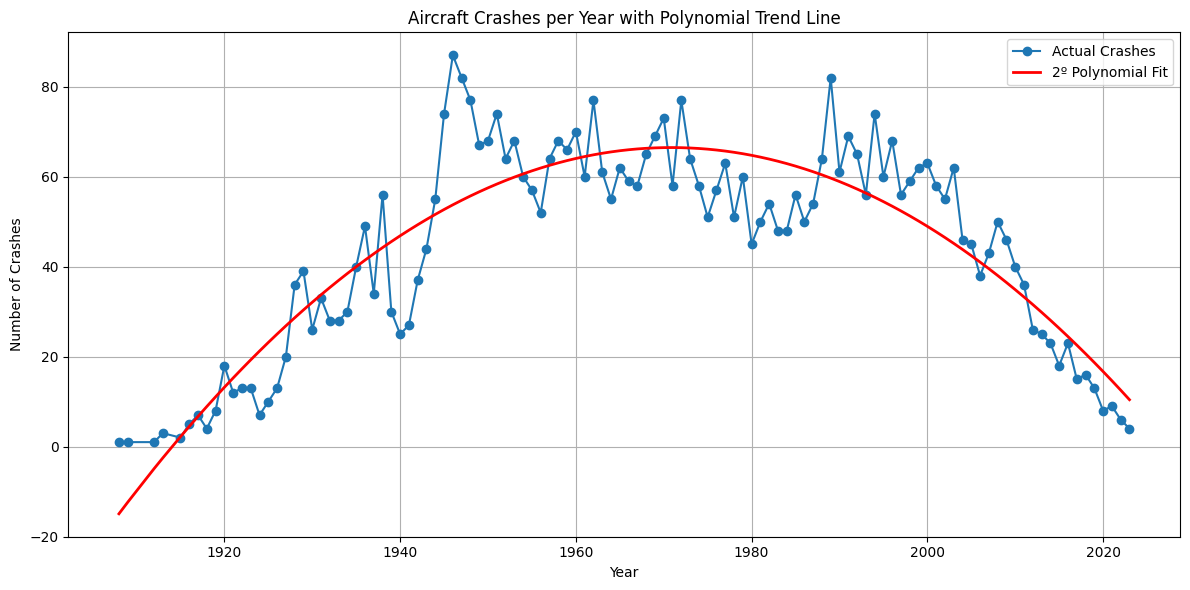

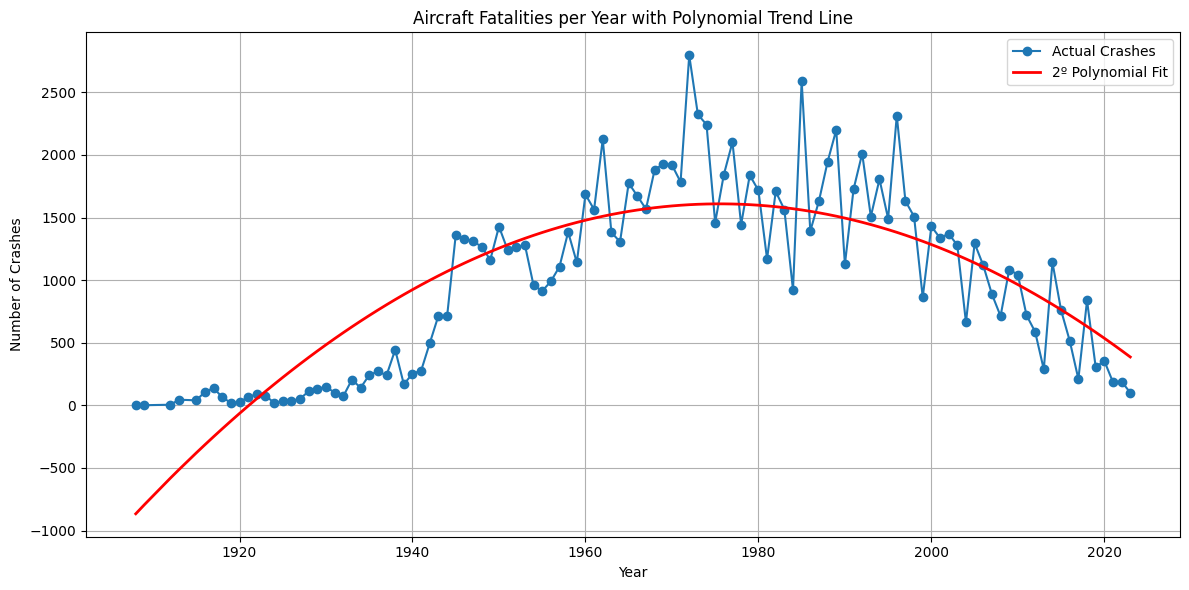

In [2]:
#Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.
crashes_per_year = df.groupby(df['Year']).size()
fatalities_per_year = df.groupby(df['Year'])['Fatalities'].sum()
aboard_per_year = df.groupby('Year')['Aboard'].sum()
survivors_per_year = aboard_per_year - fatalities_per_year
survival_rate_per_year = (survivors_per_year / aboard_per_year) * 100

#Analyze the frequency of crashes over time to identify any trends.
import numpy as np
import matplotlib.pyplot as plt
# Get x (years) and y (crash counts)
x = crashes_per_year.index.values
y = crashes_per_year.values
# Fit a polynomial (e.g., degree 2 = quadratic)
degree = 2
coeffs = np.polyfit(x, y, degree)
poly_eq = np.poly1d(coeffs)
# Generate predicted values
y_fit = poly_eq(x)
# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Actual Crashes')
plt.plot(x, y_fit, color='red', linewidth=2, label=f'{degree}º Polynomial Fit')
plt.title('Aircraft Crashes per Year with Polynomial Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Analyze the frequency of fatalities over time to identify any trends.
import numpy as np
import matplotlib.pyplot as plt
# Get x (years) and y (crash counts)
x = fatalities_per_year.index.values
y = fatalities_per_year.values
# Fit a polynomial (e.g., degree 2 = quadratic)
degree = 2
coeffs = np.polyfit(x, y, degree)
poly_eq = np.poly1d(coeffs)
# Generate predicted values
y_fit = poly_eq(x)
# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Actual Crashes')
plt.plot(x, y_fit, color='red', linewidth=2, label=f'{degree}º Polynomial Fit')
plt.title('Aircraft Fatalities per Year with Polynomial Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3. Statistical Analysis:

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.
Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

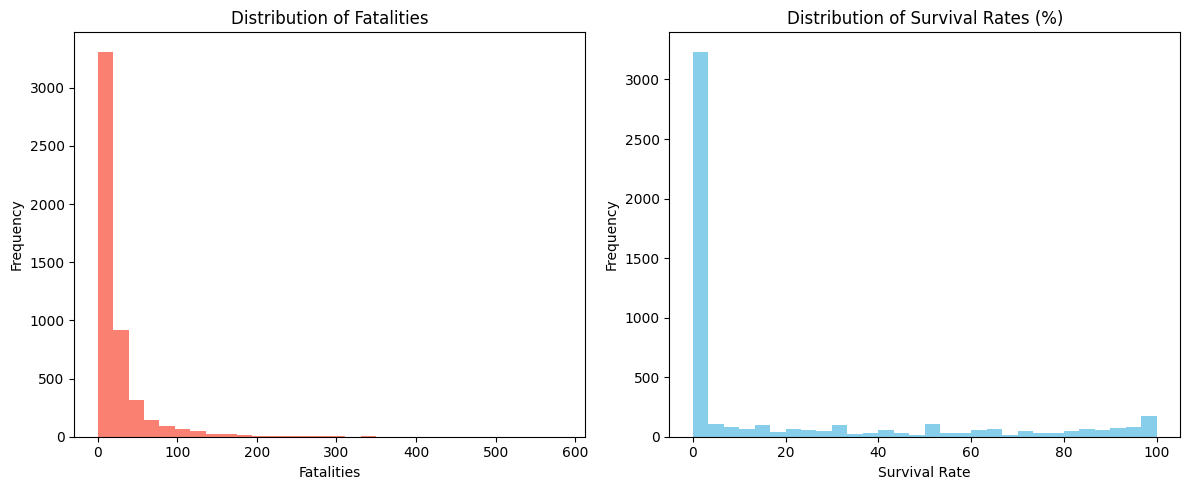

T-statistic: 3.985, P-value: 0.0001
Hypothesis is verified


In [3]:
import numpy as np
from scipy import stats

#Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.
# Calculate survivors and survival rate
df['Survivors'] = df['Aboard'] - df['Fatalities']
df['Survival Rate'] = df['Survivors'] / df['Aboard'] * 100
# Descriptive stats for fatalities
fatalities_stats = {
    'mean': stats.tmean(df['Fatalities']),
    'median': df['Fatalities'].median(),
    'std_dev': stats.tstd(df['Fatalities'])
}
# Descriptive stats for survival rate
survival_stats = {
    'mean': stats.tmean(df['Survival Rate']),
    'median': df['Survival Rate'].median(),
    'std_dev': stats.tstd(df['Survival Rate'])
}

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Histogram of fatalities
plt.subplot(1, 2, 1)
plt.hist(df['Fatalities'], bins=30, color='salmon')
plt.title('Distribution of Fatalities')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')

# Histogram of survival rate
plt.subplot(1, 2, 2)
plt.hist(df['Survival Rate'], bins=30, color='skyblue')
plt.title('Distribution of Survival Rates (%)')
plt.xlabel('Survival Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions)
#Let’s compare, for example, between 1970s and 2000s decade with a zero_hypothesis as "Number of fatalities as significantly decreased in 2000s respective to 1970s"
# Create a decade column
df['Decade'] = (df['Year'] // 10) * 10
# Subset data for two decades
fatalities_1970s = df[df['Decade'] == 1970]['Fatalities']
fatalities_2000s = df[df['Decade'] == 2000]['Fatalities']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(fatalities_1970s, fatalities_2000s, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

#Calculation of critical value
deg_free = len(fatalities_1970s) + len(fatalities_2000s) - 2
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, deg_free)

if abs(t_stat) > critical_value and p_value < alpha:
    print("Hypothesis is verified")
else:
    print("Hypothesis is contradicted")




4. Visualization:

Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.
Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

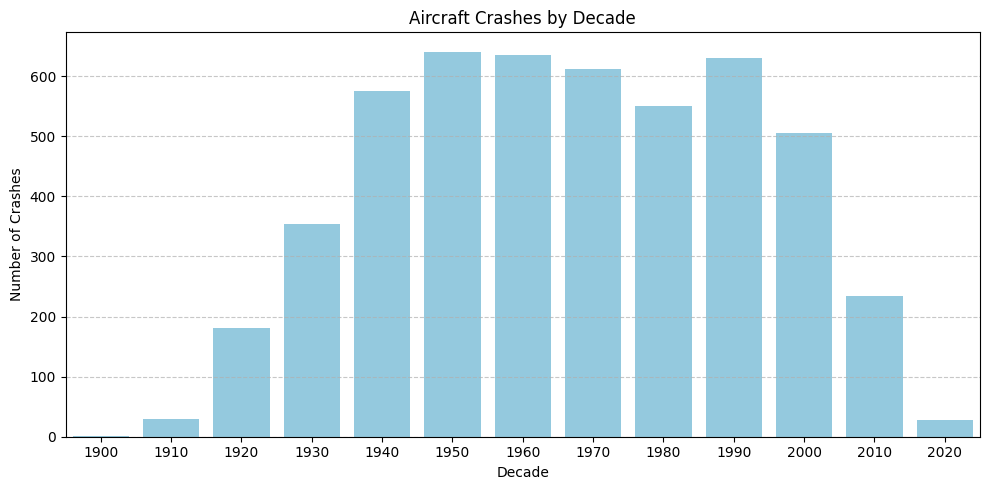

In [4]:
import seaborn as sns
# Count crashes by decade using value_counts
crashes_per_decade = df['Decade'].value_counts().sort_index()

# Convert to DataFrame for Seaborn
crash_data = crashes_per_decade.reset_index()
crash_data.columns = ['Decade', 'Crash Count']

# Plot with seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=crash_data, x='Decade', y='Crash Count', color='skyblue')

plt.title('Aircraft Crashes by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
